In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
num_paths = []
num_overlaps = []
with open("segment-10000.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
        try:
            num_paths.append(int(row[5]))
            num_overlaps.append(int(row[6]) / int(row[5]))
        except ValueError:
            continue

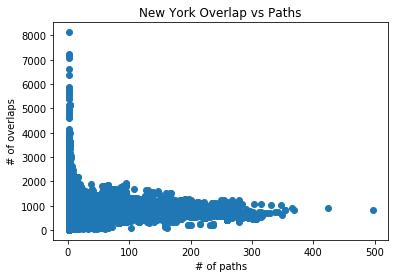

In [3]:
plt.title("New York Overlap vs Paths")
plt.scatter(num_paths, num_overlaps)
plt.ylabel("# of overlaps")
plt.xlabel("# of paths")
plt.show()

cdf(x) as discussed

cdf(x) = |#j: O_ij > x| / |#j in p_i|

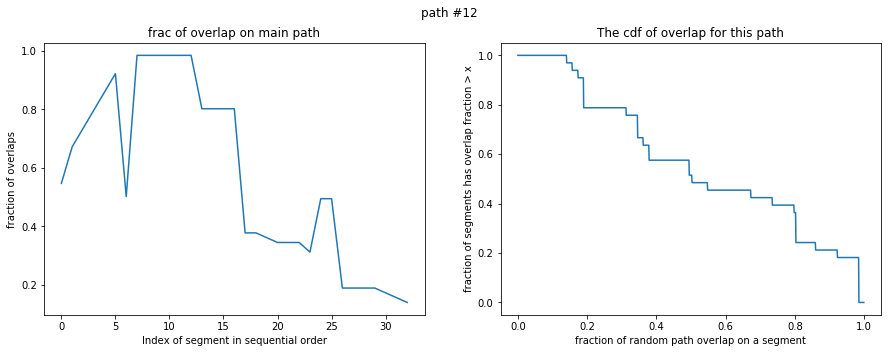

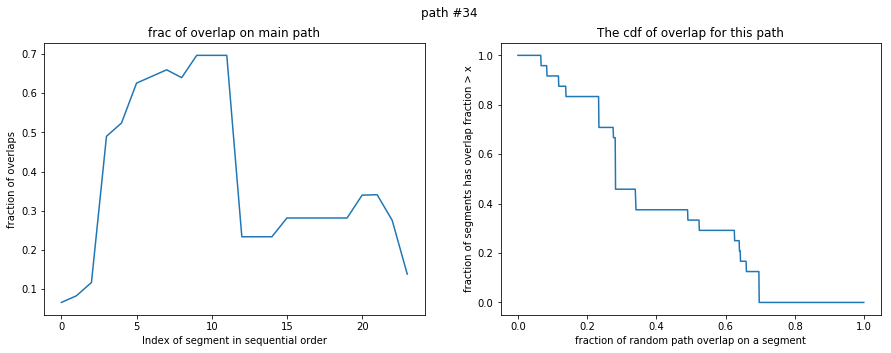

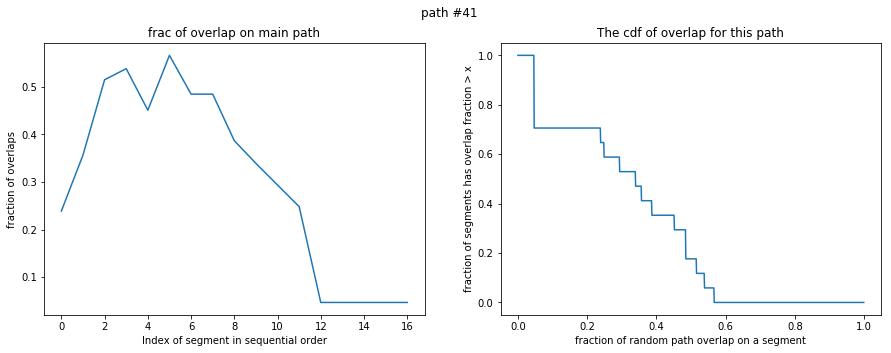

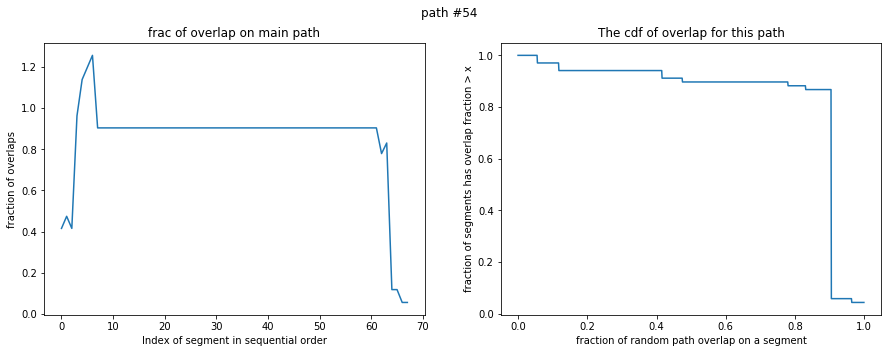

In [4]:
granularity = 0.001
paths = [12, 34, 41, 54]
with open("path.csv", "r") as f:
    lines = f.readlines()
    for line_num in paths:
        plt.figure(figsize=(15, 5))
        plt.suptitle("path #" + str(line_num))
        elements = lines[line_num].split(",")
        path_count = int(elements[0])
        seg_count = int(elements[1])
        seg_overlap = []
        for i in range(1, seg_count + 1):
            seg_overlap.append(int(elements[i * 2 + 1]) / path_count)
        plt.subplot(121)
        plt.title("frac of overlap on main path")
        plt.plot(seg_overlap)
        plt.xlabel("Index of segment in sequential order")
        plt.ylabel("fraction of overlaps")
        
        index = 0
        sorted_seg_overlap = sorted(seg_overlap)
        cdf = []
        rg = np.arange(0.0, 1.0, granularity)
        for bound in rg:
            while index < len(sorted_seg_overlap) and sorted_seg_overlap[index] < bound:
                index += 1
            cdf.append((len(sorted_seg_overlap) - index) / seg_count)
        
        plt.subplot(122)
        plt.title("The cdf of overlap for this path")
        plt.plot(rg, cdf)
        plt.xlabel("fraction of random path overlap on a segment")
        plt.ylabel("fraction of segments has overlap fraction > x")
        plt.show()

In [5]:
def getRGBfromI(RGBint):
    blue =  RGBint & 255
    green = (RGBint >> 8) & 255
    red =   (RGBint >> 16) & 255
    return red / 255, green / 255, blue / 255

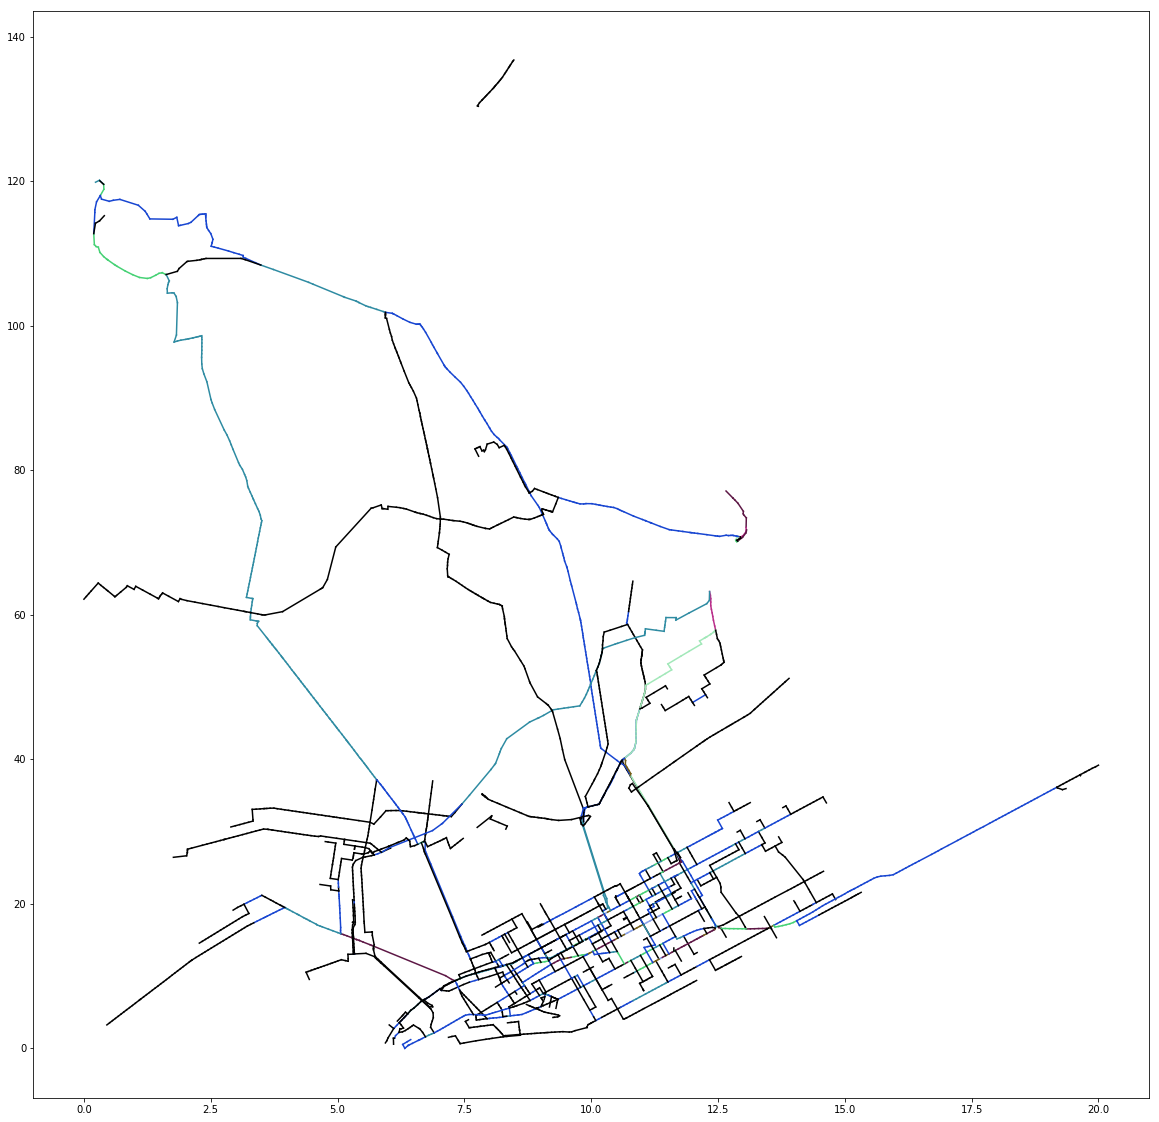

In [6]:
min_lat = 100
max_lat = -100
min_lon = 100
max_lon = -100
min_path = 100
max_path = 0
segments = []
fig_size = (20, 20)
with open("segment.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
        try:
            start_lat = float(row[1])
            start_lon = float(row[2])
            end_lat = float(row[3])
            end_lon = float(row[4])
            num_path = int(row[5])
            segments.append((start_lat, start_lon, end_lat, end_lon, num_path))
            min_lat = min(min(start_lat, end_lat), min_lat)
            max_lat = max(max(start_lat, end_lat), max_lat)
            min_lon = min(min(start_lon, end_lon), min_lon)
            max_lon = max(max(start_lon, end_lon), min_lon)
            min_path = min(min_path, num_path)
            max_path = max(max_path, num_path)
        except ValueError:
            continue
plt.figure(figsize=fig_size)
for segment in segments:
    start_lat = (segment[0] - min_lat) / (max_lat - min_lat) * fig_size[0]
    start_lon = (segment[1] - min_lon) / (max_lon - min_lon) * fig_size[1]
    end_lat = (segment[2] - min_lat) / (max_lat - min_lat) * fig_size[0]
    end_lon = (segment[3] - min_lon) / (max_lon - min_lon) * fig_size[1]
    path_color = (segment[4] - min_path) / (max_path - min_path) * 16777215
    plt.plot((start_lat, end_lat), (start_lon, end_lon),
            color=getRGBfromI(int(path_color)))
plt.show()

cdf(x; t): 

|# of p_i has at lest x% of s_ij with (# of overlap) / (# s_ij) > t| / |# of p_i|

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.7857142857142857, 0.9761904761904762, 0.9090909090909091, 1.0, 0.9411764705882353, 0.9900990099009901, 0.7857142857142857, 0.9433962264150944, 0.9900990099009901, 0.9210526315789473, 1.0, 1.0, 1.0, 0.9375, 0.8666666666666667, 0.9705882352941176, 1.0, 1.0, 0.9620253164556962, 1.0, 1.0, 1.0, 0.9743589743589743, 0.75, 1.0, 0.25, 1.0, 0.9210526315789473, 0.8695652173913043, 0.953125, 0.9166666666666666, 0.9902912621359223, 0.991869918699187, 0.9166666666666666, 1.0, 1.0, 1.0, 0.9594594594594594,

[0.0, 0.42857142857142855, 0.18181818181818182, 0.0, 0.27450980392156865, 0.0, 0.0, 0.2830188679245283, 0.7425742574257426, 0.0, 0.0, 0.36363636363636365, 0.0, 0.0, 0.0, 0.47058823529411764, 0.4423076923076923, 0.8107142857142857, 0.7468354430379747, 0.6019417475728155, 0.047619047619047616, 0.9565217391304348, 0.0, 0.0, 0.17391304347826086, 0.0, 0.0, 0.42105263157894735, 0.0, 0.5, 0.0, 0.6893203883495146, 0.6585365853658537, 0.0, 0.7142857142857143, 0.7794117647058824, 0.0, 0.10135135135135136, 0.5827338129496403, 0.0, 0.0, 0.36, 0.0, 0.0, 0.4230769230769231, 0.0, 0.8650519031141869, 0.08450704225352113, 0.7337278106508875, 0.6176470588235294, 0.7878787878787878, 0.9462809917355371, 0.6785714285714286, 0.8823529411764706, 0.045454545454545456, 0.30434782608695654, 0.0, 0.0, 0.0, 0.6081081081081081, 0.423728813559322, 0.8375, 0.36363636363636365, 0.64, 0.3291139240506329, 0.0, 0.0, 0.65, 0.2, 0.5666666666666667, 0.896969696969697, 0.24175824175824176, 0.21164021164021163, 0.78225806451

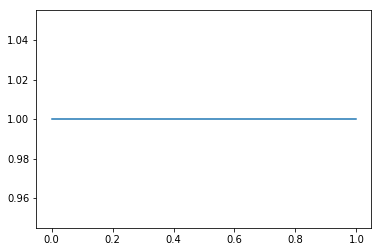

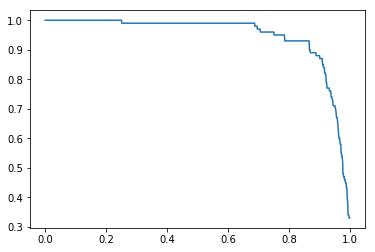

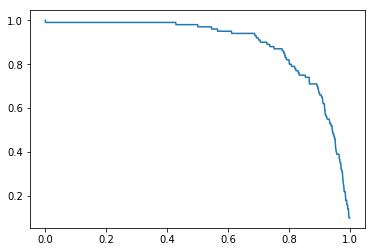

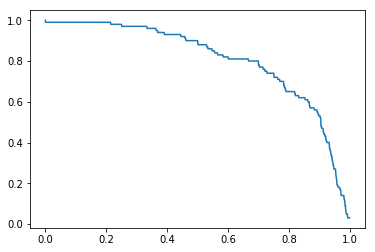

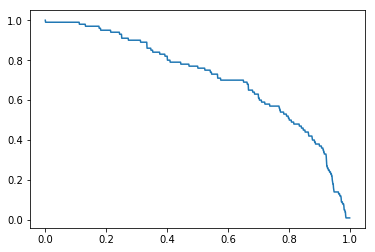

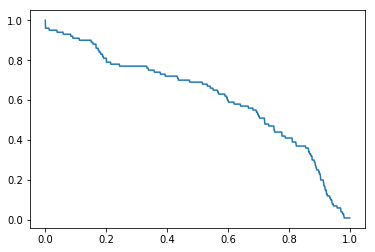

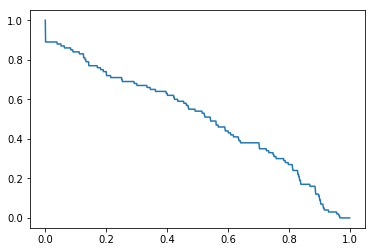

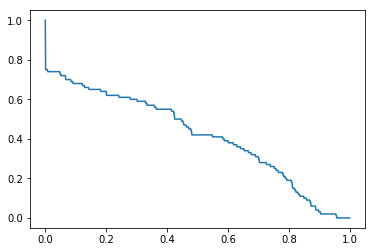

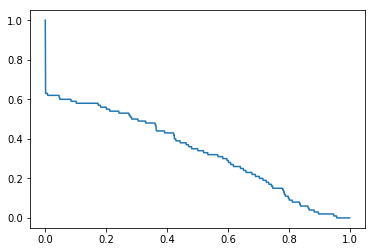

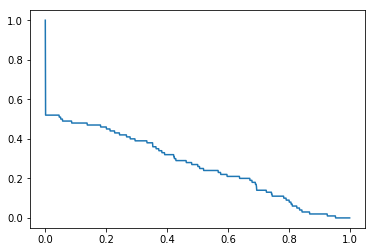

In [14]:
ts = np.arange(0.0, 1.0, 0.1)
granularity = 0.001
with open("path.csv", "r") as f:
    f.readline()
    lines = f.readlines()
    splited_lines = [line.split(",") for line in lines ]
    for i in range(len(splited_lines)):
        for j in range(len(splited_lines[i])):
            splited_lines[i][j] = int(splited_lines[i][j])
    for t in ts:
        plt.figure()
        path_overlap_count = []
        for line in splited_lines:
            path_count = line[0]
            seg_count = line[1]
            count = 0
            for i in range(1, seg_count + 1):
                if line[i * 2 + 1] / path_count > t:
                    count += 1
            path_overlap_count.append(count / seg_count)
        print(path_overlap_count)
        index = 0
        sorted_path_overlap_count = sorted(path_overlap_count)
        cdf = []
        rg = np.arange(0.0, 1.0, granularity)
        for bound in rg:
            while index < len(sorted_path_overlap_count) and sorted_path_overlap_count[index] < bound:
                index += 1
            cdf.append((len(sorted_path_overlap_count) - index) / len(splited_lines))
        plt.plot(rg, cdf)
    plt.show()